In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [25]:
location= 'Data/properatti.csv'

df = pd.read_csv(location, index_col=0)

In [26]:
# Filtro sólo CABA y elmino los stores del tipo de propiedad
df2 = df[(df['property_type'].isin(['apartment','house','PH'])) & (df['state_name'] == 'Capital Federal')]

# Chequeo NaN
display(df2.info())

# Saco las columnas operatcion y estado, ya que son columnas con un solo valor y sin NA
df2 = df2.drop(['lat-lon','rooms','floor','expenses','operation', 'state_name', 'lat','lon','place_with_parent_names', 'country_name', 'geonames_id','price','currency'], axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30952 entries, 0 to 121219
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   30952 non-null  object 
 1   property_type               30952 non-null  object 
 2   place_name                  30952 non-null  object 
 3   place_with_parent_names     30952 non-null  object 
 4   country_name                30952 non-null  object 
 5   state_name                  30952 non-null  object 
 6   geonames_id                 29737 non-null  float64
 7   lat-lon                     22631 non-null  object 
 8   lat                         22631 non-null  float64
 9   lon                         22631 non-null  float64
 10  price                       27828 non-null  float64
 11  currency                    27828 non-null  object 
 12  price_aprox_local_currency  27828 non-null  float64
 13  price_aprox_usd             27

None

In [27]:
df2['place_name'].value_counts()

Belgrano           2925
Palermo            2773
Caballito          2235
Villa Urquiza      1605
Recoleta           1453
                   ... 
Villa Real           36
Palermo Viejo        36
Villa Soldati        13
Villa Riachuelo       6
Catalinas             3
Name: place_name, Length: 62, dtype: int64

In [28]:
df2.columns

Index(['property_type', 'place_name', 'price_aprox_local_currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'properati_url', 'description',
       'title', 'image_thumbnail'],
      dtype='object')

## Features de "amenities"

In [29]:
def clasificarAmenities(dataset):
    ##esta funcion modifica el dataset de manera que agrega las columnas de amenities
    #inicializo columnas
    dataset['tiene_jardin'] = np.NaN
    dataset['tiene_cochera'] = np.NaN
    dataset['tiene_pileta'] = np.NaN
    dataset['tiene_parrilla'] = np.NaN
    
    ##regex
    #Expresiones regulares a utilizar
    re_jardin = re.compile("(jardin|garden|green|parque|parquizado|pasto)+|\s(sum)+", flags=re.IGNORECASE)
    re_cochera = re.compile("(garage|cochera)+|\s(sum)+", flags=re.IGNORECASE)
    re_pileta = re.compile("(pileta|piscina|pile)+|\s(sum)+", flags=re.IGNORECASE)
    re_parrilla = re.compile("(parrilla|bbq|barbaque|asado|asador)+|\s(sum)+", flags=re.IGNORECASE)
    
    #
    for i in dataset.description.index:
        
        dataset.tiene_jardin[i] = 0
        dataset.tiene_cochera[i] = 0
        dataset.tiene_pileta[i] = 0
        dataset.tiene_parrilla[i] = 0
        
        if dataset['description'][i] is not None:
            
            reg_search = re_jardin.search(str(dataset['description'][i]))
            if reg_search:
                dataset.tiene_jardin[i] = 1
                
            reg_search = re_cochera.search(str(dataset['description'][i]))
            if reg_search:
                dataset.tiene_cochera[i] = 1
                
            reg_search = re_pileta.search(str(dataset['description'][i]))
            if reg_search:
                dataset.tiene_pileta[i] = 1
                
            reg_search = re_parrilla.search(str(dataset['description'][i]))
            if reg_search:
                dataset.tiene_parrilla[i] = 1
                
                
        if dataset['title'][i] is not None:
            
            reg_search = re_jardin.search(str(dataset['title'][i]))
            if reg_search:
                dataset.tiene_jardin[i] = 1
                
            reg_search = re_cochera.search(str(dataset['title'][i]))
            if reg_search:
                dataset.tiene_cochera[i] = 1
                
            reg_search = re_pileta.search(str(dataset['title'][i]))
            if reg_search:
                dataset.tiene_pileta[i] = 1
                
            reg_search = re_parrilla.search(str(dataset['title'][i]))
            if reg_search:
                dataset.tiene_parrilla[i] = 1                
                
                              
        if dataset['properati_url'][i] is not None:
            
            reg_search = re_jardin.search(str(dataset['properati_url'][i]))
            if reg_search:
                dataset.tiene_jardin[i] = 1
                
            reg_search = re_cochera.search(str(dataset['properati_url'][i]))
            if reg_search:
                dataset.tiene_cochera[i] = 1
                
            reg_search = re_pileta.search(str(dataset['properati_url'][i]))
            if reg_search:
                dataset.tiene_pileta[i] = 1
                
            reg_search = re_parrilla.search(str(dataset['properati_url'][i]))
            if reg_search:
                dataset.tiene_parrilla[i] = 1                
                  
    return dataset            

In [30]:
clasificarAmenities(df2)

C:\Users\alanp\AppData\Local\Temp/ipykernel_20792/3445030929.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.tiene_jardin[i] = 0
C:\Users\alanp\AppData\Local\Temp/ipykernel_20792/3445030929.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.tiene_cochera[i] = 0
C:\Users\alanp\AppData\Local\Temp/ipykernel_20792/3445030929.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.tiene_pileta[i] = 0
C:\Users\ala

,property_type,place_name,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,properati_url,description,title,image_thumbnail,tiene_jardin,tiene_cochera,tiene_pileta,tiene_parrilla
0,PH,Mataderos,1093959.00,62000.0,55.0,40.0,1127.272727,1550.000000,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,0.0,0.0,0.0,0.0
2,apartment,Mataderos,1270404.00,72000.0,55.0,55.0,1309.090909,1309.090909,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,0.0,0.0,0.0,0.0
3,PH,Liniers,1676227.50,95000.0,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,0.0,0.0,0.0,0.0
7,apartment,Belgrano,2434941.00,138000.0,45.0,40.0,3066.666667,3450.000000,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...,0.0,0.0,1.0,0.0
8,apartment,Belgrano,3440677.50,195000.0,65.0,60.0,3000.000000,3250.000000,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121160,apartment,Belgrano,7234245.00,410000.0,157.0,NaN,2611.464968,NaN,http://www.properati.com.ar/1cj5v_venta_depart...,Edificio en esquina de muy buena categoría de ...,Av .Luis Maria Campos 1400- Belgrano-Capital F...,https://thumbs4.properati.com/0/zeLNBuyylOJL7z...,1.0,0.0,0.0,0.0
121209,apartment,Belgrano,7234245.00,410000.0,157.0,NaN,2611.464968,NaN,http://www.properati.com.ar/1cj7c_venta_depart...,Edificio en esquina de muy buena categoría de ...,Av .Luis Maria Campos 1400- Belgrano-Capital F...,https://thumbs4.properati.com/0/zeLNBuyylOJL7z...,1.0,0.0,0.0,0.0
121215,apartment,Belgrano,15350715.00,870000.0,113.0,93.0,7699.115044,9354.838710,http://www.properati.com.ar/1cja2_venta_depart...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...,0.0,1.0,1.0,1.0
121217,apartment,Villa Urquiza,2320251.75,131500.0,46.0,39.0,2858.695652,3371.794872,http://www.properati.com.ar/1cja7_venta_depart...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,https://thumbs4.properati.com/9/YAe_-2gRVykADP...,0.0,1.0,0.0,1.0


## Columnas a agregar/eliminar

- Amenities: Booleano. Pileta, garage/cochera, parrilla, sum, garden/jardin
- Cuota: Booleano. Ver si sigue aplicando para planes, y si eliminamos o no.
- superficie: unificar los regex de los dos grupos
- Sup total y cubierta: Tomas buscará en los trabajos del resto. Julio había imputado esto, traer el código al nuevo dataset. Revisar le tema de las que tiene valores diferentes.
- image_thumbnail: Ver si los duplicados que se encontraron son relevantes en el nuevo dataset, y ulego eliminarla
- Floor: Aplicar el regex y ver con cuantos datos nos quedamos.
- rooms y ambientes: Ver los regex que se armaron, como aplican al nuevo dataset
- expensas por ahora se elimina
- Description y title: Se saca todos los datos y se elimina

## Agregado de columnas "ambiuentes", "cuota"e imputación de superficie

In [31]:
def superficie(df2):

    #regex para encontrar las diferentes características

    patron = '(?P<m2>\d\d\d+\s\s*m2|\d\d\d+\s\s*M2|\d\d\d+\s\s*metro|\d\d\d+\s\s*METRO)|(?P<ambiente>\d+\sambiente|\d+\sAMBIENTE|\d+\sAMB|\d+\samb|\d+\sAMBS|\d+\sambs)|(?P<balcon>balcon|BALCON)|(?P<planta_alta>planta\salta|PLANTA\sALTA)|(?P<patio>patio|PATIO)|(?P<duplex>duplex|DUPLEX)|(?P<cuota>cuota|CUOTA)|(?P<amenities>parrilla|bbq|barbaque|asado|asador|cochera|pileta|piscina|pile|patio|terraza|solarium|pile|jardin|garden|green|parque|parquizado|pasto)+|\s(sum)+'
    patron_regex = re.compile(patron)
    patron_match = df2.description.apply(lambda x : patron_regex.search(str(x)))

    # Extrae los metros cuadrados de la descripción, luego extrae el número (sin unidad) y posteriormente elimina aquellos menores que 3 para que no tome por error el número 2 de la unidad de medida
    # Genera una serie m2

    m2 = patron_match.apply(lambda x: x if x is None else x.group('m2'))
    patron_num = '\d+'
    patron_num_regex = re.compile(patron_num)
    m2 = m2.apply(lambda x: x if x is None else patron_num_regex.findall(x))
    # Extrae solo el valor de la superficie, evitando considerar el 2 de "m2"
    m2 = m2.apply(lambda x: x if x is None else x[0])
    m2 = pd.to_numeric(m2)
    m2 = m2.apply(lambda x: x if x is None else (None if x<3 else x))

    # Extrae la cantidad de ambientes, de la descripción, luego extrae el número (sin unidad) y posteriormente elimina aquellos menores que 3 para que no tome por error el número 2 de la unidad de medida
    # Genera una serie ambientes

    ambientes = patron_match.apply(lambda x: x if x is None else x.group('ambiente'))
    ambientes = ambientes.apply(lambda x: x if x is None else x[0])
    ambientes = pd.to_numeric(ambientes)


    # Extrae la cantidad de ambientes, balcón, patio, duplex, y planta alta y amenities de la descripción. Genera una serie booleana

    #balcon = patron_match.apply(lambda x: x if x is None else x.group('balcon'))
    #balcon = balcon.apply(lambda x: False if x is None else True)

    #patio = patron_match.apply(lambda x: x if x is None else x.group('patio'))
    #patio = patio.apply(lambda x: False if x is None else True)

    #duplex = patron_match.apply(lambda x: x if x is None else x.group('duplex'))
    #duplex = duplex.apply(lambda x: False if x is None else True)

    #planta_alta = patron_match.apply(lambda x: x if x is None else x.group('planta_alta'))
    #planta_alta = planta_alta.apply(lambda x: False if x is None else True)

    #amenities = patron_match.apply(lambda x: x if x is None else x.group('amenities'))
    #amenities = amenities.apply(lambda x: False if x is None else True)

    cuota = patron_match.apply(lambda x: x if x is None else x.group('cuota'))
    cuota = cuota.apply(lambda x: 0 if x is None else 1)
    
    df2['sup_m2_re'] = m2
    df2['ambientes'] = ambientes
    df2['cuota'] = cuota
    
    return df2

In [32]:
superficie(df2)

,property_type,place_name,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,properati_url,description,title,image_thumbnail,tiene_jardin,tiene_cochera,tiene_pileta,tiene_parrilla,sup_m2_re,ambientes,cuota
0,PH,Mataderos,1093959.00,62000.0,55.0,40.0,1127.272727,1550.000000,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,0.0,0.0,0.0,0.0,NaN,2.0,0
2,apartment,Mataderos,1270404.00,72000.0,55.0,55.0,1309.090909,1309.090909,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,0.0,0.0,0.0,0.0,NaN,2.0,0
3,PH,Liniers,1676227.50,95000.0,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,0.0,0.0,0.0,0.0,NaN,3.0,0
7,apartment,Belgrano,2434941.00,138000.0,45.0,40.0,3066.666667,3450.000000,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...,0.0,0.0,1.0,0.0,NaN,NaN,0
8,apartment,Belgrano,3440677.50,195000.0,65.0,60.0,3000.000000,3250.000000,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...,0.0,0.0,1.0,0.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121160,apartment,Belgrano,7234245.00,410000.0,157.0,NaN,2611.464968,NaN,http://www.properati.com.ar/1cj5v_venta_depart...,Edificio en esquina de muy buena categoría de ...,Av .Luis Maria Campos 1400- Belgrano-Capital F...,https://thumbs4.properati.com/0/zeLNBuyylOJL7z...,1.0,0.0,0.0,0.0,NaN,NaN,0
121209,apartment,Belgrano,7234245.00,410000.0,157.0,NaN,2611.464968,NaN,http://www.properati.com.ar/1cj7c_venta_depart...,Edificio en esquina de muy buena categoría de ...,Av .Luis Maria Campos 1400- Belgrano-Capital F...,https://thumbs4.properati.com/0/zeLNBuyylOJL7z...,1.0,0.0,0.0,0.0,NaN,NaN,0
121215,apartment,Belgrano,15350715.00,870000.0,113.0,93.0,7699.115044,9354.838710,http://www.properati.com.ar/1cja2_venta_depart...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...,0.0,1.0,1.0,1.0,NaN,NaN,0
121217,apartment,Villa Urquiza,2320251.75,131500.0,46.0,39.0,2858.695652,3371.794872,http://www.properati.com.ar/1cja7_venta_depart...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,https://thumbs4.properati.com/9/YAe_-2gRVykADP...,0.0,1.0,0.0,1.0,NaN,NaN,0


In [33]:
mask_sup_cov = (df2['sup_m2_re'].notna()) & (df2['surface_covered_in_m2'].isna())
mask_sup_cov.sum()

82

In [34]:
# Función que completa datos faltantes de superficie con datos extraídos de la descripción.
def compl_m2_re (row):
    if row['surface_covered_in_m2']>=0:
        result = row['surface_covered_in_m2']
    else:
        result = row['sup_m2_re']
    return result

df2['surface_covered_in_m2'] = df2.apply(compl_m2_re, axis = 1)

In [35]:
# Verifico si se imputaron correctamente.

df2['surface_covered_in_m2'].notnull().sum()

28882

In [36]:
# Determinar la cantidad de filas que pueden tener invertidas los datos de superficie cubierta con superficie total

sup_mask = df2['surface_covered_in_m2'] > df2['surface_total_in_m2']
print(f'Cantidad de filas con sup_cov > sup_total {sup_mask.sum()}')

Cantidad de filas con sup_cov > sup_total 131


In [37]:
# Función para corregir los valores invertidos de superficie cubierta y superficie total

df2['surface_covered_in_m2_aux'] = df2['surface_covered_in_m2']

def invertir_sup_cov (row):
    if (row['surface_covered_in_m2'] > row['surface_total_in_m2']):
        return row['surface_total_in_m2']
    else:
        return row['surface_covered_in_m2']

def invertir_sup_tot (row):
    if (row['surface_covered_in_m2'] == row['surface_total_in_m2']):
        return row['surface_covered_in_m2_aux']
    else:
        return row['surface_total_in_m2'] 
    
df2.loc[sup_mask,'surface_covered_in_m2'] = df2.apply(invertir_sup_tot, axis=1)
df2.loc[sup_mask,'surface_total_in_m2']  = df2.apply(invertir_sup_tot, axis=1)

In [38]:
df2.columns

Index(['property_type', 'place_name', 'price_aprox_local_currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'properati_url', 'description',
       'title', 'image_thumbnail', 'tiene_jardin', 'tiene_cochera',
       'tiene_pileta', 'tiene_parrilla', 'sup_m2_re', 'ambientes', 'cuota',
       'surface_covered_in_m2_aux'],
      dtype='object')

In [39]:
# Elimino la columna auxiliar generada

df2.drop('surface_covered_in_m2_aux', axis=1, inplace=True)
df2.drop('sup_m2_re', axis=1, inplace=True)
#df2.drop('ambientes', axis=1, inplace=True)

In [40]:
# Verificación de la corrección de cambio de columnas e imputación.

sup_mask = df2['surface_covered_in_m2'] > df2['surface_total_in_m2']
print(f'Cantidad de filas con sup_cov > sup_total {sup_mask.sum()}')

Cantidad de filas con sup_cov > sup_total 0


In [41]:
# Imputo los valores de superficie cubierta y total, considerando que si tengo uno solo de los dos, son el mismo valor

# Imputo superficie total con los datos de cuubierta
mask_sup_cov = (df2['surface_covered_in_m2'].notna()) & (df2['surface_total_in_m2'].isna())
print('Datos a imputar en sup_total: ',mask_sup_cov.sum())

def compl_m2_cub (row):
    if row['surface_total_in_m2']>=0:
        result = row['surface_total_in_m2']
    else:
        result = row['surface_covered_in_m2']
    return result

df2['surface_total_in_m2'] = df2.apply(compl_m2_cub, axis = 1)
display(df2.info())

# Imputo superficie cubierta con los datos de total
mask_sup_cov = (df2['surface_total_in_m2'].notna()) & (df2['surface_covered_in_m2'].isna())
print('Datos a imputar en sup_cubierta: ',mask_sup_cov.sum())

def compl_m2_tot (row):
    if row['surface_covered_in_m2']>=0:
        result = row['surface_covered_in_m2']
    else:
        result = row['surface_total_in_m2']
    return result

df2['surface_covered_in_m2'] = df2.apply(compl_m2_tot, axis = 1)
display(df2.info())

Datos a imputar en sup_total:  4887
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30952 entries, 0 to 121219
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_type               30952 non-null  object 
 1   place_name                  30952 non-null  object 
 2   price_aprox_local_currency  27828 non-null  float64
 3   price_aprox_usd             27828 non-null  float64
 4   surface_total_in_m2         30259 non-null  float64
 5   surface_covered_in_m2       28882 non-null  float64
 6   price_usd_per_m2            22519 non-null  float64
 7   price_per_m2                26276 non-null  float64
 8   properati_url               30952 non-null  object 
 9   description                 30952 non-null  object 
 10  title                       30952 non-null  object 
 11  image_thumbnail             30477 non-null  object 
 12  tiene_jardin                30952 non-null  float64

None

Datos a imputar en sup_cubierta:  1377
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30952 entries, 0 to 121219
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_type               30952 non-null  object 
 1   place_name                  30952 non-null  object 
 2   price_aprox_local_currency  27828 non-null  float64
 3   price_aprox_usd             27828 non-null  float64
 4   surface_total_in_m2         30259 non-null  float64
 5   surface_covered_in_m2       30259 non-null  float64
 6   price_usd_per_m2            22519 non-null  float64
 7   price_per_m2                26276 non-null  float64
 8   properati_url               30952 non-null  object 
 9   description                 30952 non-null  object 
 10  title                       30952 non-null  object 
 11  image_thumbnail             30477 non-null  object 
 12  tiene_jardin                30952 non-null  floa

None

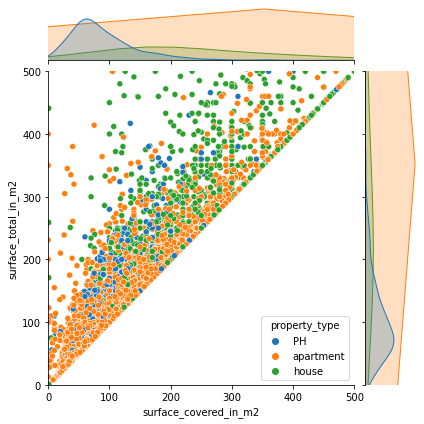

In [43]:
sns.jointplot(x='surface_covered_in_m2', y='surface_total_in_m2',data=df2, hue='property_type',xlim=(0,500), ylim=(0,500))

In [44]:
display(df2.columns)
df2.head()

Index(['property_type', 'place_name', 'price_aprox_local_currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'properati_url', 'description',
       'title', 'image_thumbnail', 'tiene_jardin', 'tiene_cochera',
       'tiene_pileta', 'tiene_parrilla', 'ambientes', 'cuota'],
      dtype='object')

,property_type,place_name,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,properati_url,description,title,image_thumbnail,tiene_jardin,tiene_cochera,tiene_pileta,tiene_parrilla,ambientes,cuota
0,PH,Mataderos,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,0.0,0.0,0.0,0.0,2.0,0
2,apartment,Mataderos,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,0.0,0.0,0.0,0.0,2.0,0
3,PH,Liniers,1676227.5,95000.0,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,0.0,0.0,0.0,0.0,3.0,0
7,apartment,Belgrano,2434941.0,138000.0,45.0,40.0,3066.666667,3450.000000,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...,0.0,0.0,1.0,0.0,NaN,0
8,apartment,Belgrano,3440677.5,195000.0,65.0,60.0,3000.000000,3250.000000,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...,0.0,0.0,1.0,0.0,NaN,0


In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30952 entries, 0 to 121219
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_type               30952 non-null  object 
 1   place_name                  30952 non-null  object 
 2   price_aprox_local_currency  27828 non-null  float64
 3   price_aprox_usd             27828 non-null  float64
 4   surface_total_in_m2         30259 non-null  float64
 5   surface_covered_in_m2       30259 non-null  float64
 6   price_usd_per_m2            22519 non-null  float64
 7   price_per_m2                26276 non-null  float64
 8   properati_url               30952 non-null  object 
 9   description                 30952 non-null  object 
 10  title                       30952 non-null  object 
 11  image_thumbnail             30477 non-null  object 
 12  tiene_jardin                30952 non-null  float64
 13  tiene_cochera               30

## Conversion de pasos a dolares

Tipo de cambio promedio entre entre 'price_aprox_local_currency' y 'price_aprox_usd':  17.64 $/USD 

In [46]:
def estimar_tipo_de_cambio(data):
    #'Esta función estima el tipo de cambio promedio entre 'price_aprox_local_currency' y 'price_aprox_usd'
    mask_tipo_de_cambio = (data['price_aprox_local_currency'].notnull() & data['price_aprox_usd'].notnull())
    calculo_tipo_de_cambio = data.loc[mask_tipo_de_cambio, 'price_aprox_local_currency'] / data.loc[mask_tipo_de_cambio, 'price_aprox_usd']
    tipo_de_cambio = calculo_tipo_de_cambio.mean()
    valor = round(tipo_de_cambio, 2)
    return valor


In [47]:
valor_dolar = estimar_tipo_de_cambio(df2)
print(valor_dolar)

17.64


In [48]:
def calculo_valor_total_pesos_dolar(dataframe, valor_dolar):
    #precio m2 en pesos a precio m2 en dolares
    for i in dataframe.index:
        if pd.isna(dataframe.loc[i, 'price_usd_per_m2']):
            dataframe.loc[i, 'price_usd_per_m2'] = dataframe.loc[i, 'price_per_m2'] / valor_dolar
    
    return dataframe

In [49]:
df2 = calculo_valor_total_pesos_dolar(df2, valor_dolar)

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30952 entries, 0 to 121219
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_type               30952 non-null  object 
 1   place_name                  30952 non-null  object 
 2   price_aprox_local_currency  27828 non-null  float64
 3   price_aprox_usd             27828 non-null  float64
 4   surface_total_in_m2         30259 non-null  float64
 5   surface_covered_in_m2       30259 non-null  float64
 6   price_usd_per_m2            27307 non-null  float64
 7   price_per_m2                26276 non-null  float64
 8   properati_url               30952 non-null  object 
 9   description                 30952 non-null  object 
 10  title                       30952 non-null  object 
 11  image_thumbnail             30477 non-null  object 
 12  tiene_jardin                30952 non-null  float64
 13  tiene_cochera               30

In [51]:
#Dropeo todas las features que necesitan tratamiento previo para servir
df2 = df2.drop(['description','title','image_thumbnail','price_per_m2','properati_url', 'price_aprox_local_currency'], axis=1)

In [52]:
df2 = df2.drop('ambientes',axis=1)

In [53]:
df2 = df2.dropna()

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27307 entries, 0 to 121219
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          27307 non-null  object 
 1   place_name             27307 non-null  object 
 2   price_aprox_usd        27307 non-null  float64
 3   surface_total_in_m2    27307 non-null  float64
 4   surface_covered_in_m2  27307 non-null  float64
 5   price_usd_per_m2       27307 non-null  float64
 6   tiene_jardin           27307 non-null  float64
 7   tiene_cochera          27307 non-null  float64
 8   tiene_pileta           27307 non-null  float64
 9   tiene_parrilla         27307 non-null  float64
 10  cuota                  27307 non-null  int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 2.5+ MB


## test modelado básico

In [55]:
# importo los librerías para el modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn import metrics

### Modelado SOLO con place_name y property_type

In [67]:
df2.property_type.value_counts()

apartment    21214
house         1469
PH            1358
Name: property_type, dtype: int64

In [71]:
# Eliminamos todos los barrios con menos de 250 entradas
group_place_name = df2.groupby('place_name')['place_name'].count()
lista_barrios = []

for x in group_place_name.index:
    if group_place_name[x]>250:
        lista_barrios.append(x)
# list = [x for x in group_place_name.index if group_place_name[x]>250]


df2 = df2[df2['place_name'].isin(lista_barrios)]

In [72]:
df2['place_name'].value_counts()

Belgrano             2468
Palermo              2387
Caballito            2000
Villa Urquiza        1331
Recoleta             1326
Flores               1201
Villa Crespo         1106
San Telmo            1103
Barrio Norte          955
Almagro               941
Capital Federal       867
Boedo                 829
Nuñez                 680
Balvanera             588
Puerto Madero         555
San Cristobal         549
Saavedra              497
Monserrat             454
Palermo Hollywood     453
Villa del Parque      436
Floresta              407
Barracas              380
Villa Devoto          365
Villa Luro            352
Mataderos             337
Colegiales            334
Palermo Soho          307
Liniers               295
Parque Patricios      270
Congreso              268
Name: place_name, dtype: int64

In [82]:
# Selecciono las columnas que considero features para modelar 
X = df2.loc[:,['property_type','place_name']]
y = df2['price_usd_per_m2']

# Convierto a dummies las categóricas
X = pd.get_dummies(X,drop_first=True)

# Separo en train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=33)

X.shape, y.shape, X_train.shape,X_test.shape, y_train.shape, y_test.shape

((24041, 31), (24041,), (18030, 31), (6011, 31), (18030,), (6011,))

In [83]:
#prueba con crossvalidation con Ridge
rcv = RidgeCV(alphas=(0.0001,0.001,0.01,0.1,1,10,100,1000,10000), cv=5)

rcv.fit(X_train,y_train)
print('intercept: ',rcv.intercept_,'coef: ', rcv.coef_,'alpha: ', rcv.alpha_)

y_pred_rcv = rcv.predict(X_test)

metrics.r2_score(y_test, y_pred_rcv)

intercept:  1407.153115291106 coef:  [ 1224.48695568    21.2178587  -1001.51514817  -622.96873516
   143.5921864    160.52842616  7812.44619962  -444.12004447
  -438.52358608  -389.30925439  -564.05087969  -714.19593336
  -999.67948195  -638.19708162  -604.39579306 -1187.00404765
    75.22120581   199.43264399   359.22542444   500.48172768
  -647.2190963   2587.71815855   235.08821982  -235.58776892
  5644.6010124   -529.05364222  -282.3774712   -334.70118548
  -399.18280479  -409.85047452  -561.65550654] alpha:  10.0


0.22245471068939204

## Modelado con todas las features

In [58]:
df2.columns

Index(['property_type', 'place_name', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'tiene_jardin',
       'tiene_cochera', 'tiene_pileta', 'tiene_parrilla', 'cuota'],
      dtype='object')

In [84]:
# Selecciono las columnas que considero features para modelar 
X = df2.loc[:,['property_type','place_name','surface_total_in_m2','surface_covered_in_m2','tiene_cochera','tiene_pileta','tiene_parrilla','cuota' ]]
y = df2['price_usd_per_m2']

# Convierto a dummies las categóricas
X = pd.get_dummies(X,drop_first=True)

# Separo en train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=33, stratify = df2['place_name'])

X.shape, y.shape, X_train.shape,X_test.shape, y_train.shape, y_test.shape

((24041, 37), (24041,), (18030, 37), (6011, 37), (18030,), (6011,))

In [60]:
lr = LinearRegression()

lr.fit(X_train,y_train)
print('intercept: ',lr.intercept_,'coef: ', lr.coef_)

(1182.9592391525584,
 array([-7.02117193e-01,  6.84884084e-01,  1.44613189e+02,  1.02678744e+03,
         3.86072764e+01,  1.54888869e+03,  8.56451488e+02, -2.37954757e+02,
        -5.54335776e+02, -4.20495613e+02,  4.27553275e+02,  1.63089230e+02,
         7.18445637e+03, -3.05064130e+02, -3.93428701e+02, -3.36737410e+02,
        -3.32160373e+02, -5.90487146e+02, -6.92427585e+02, -3.43759626e+02,
        -3.38766486e+02, -1.18681918e+03,  1.18099588e+02,  2.90768487e+02,
         2.17711044e+02,  4.31112482e+02, -6.22574125e+02,  2.78625742e+03,
         5.69223313e+02, -2.99656185e+02,  5.67350928e+03, -4.70248583e+02,
        -5.76817119e+01, -9.90388116e+01, -1.24992467e+02, -3.47310302e+02,
        -4.94055662e+02]))

In [61]:
y_pred = lr.predict(X_test)

metrics.r2_score(y_test, y_pred)

0.2642815258195935

## Ridge

In [62]:
#prueba con crossvalidation con Ridge
rcv = RidgeCV(alphas=(0.0001,0.001,0.01,0.1,1,10,100,1000,10000), cv=5)

rcv.fit(X_train,y_train)
print('intercept: ',rcv.intercept_,'coef: ', rcv.coef_,'alpha: ', rcv.alpha_)

y_pred_rcv = rcv.predict(X_test)

metrics.r2_score(y_test, y_pred_rcv)

(1182.960612684789,
 array([-7.02117354e-01,  6.84884245e-01,  1.44613229e+02,  1.02678756e+03,
         3.86073245e+01,  1.54888897e+03,  8.56451439e+02, -2.37954830e+02,
        -5.54337000e+02, -4.20496860e+02,  4.27551839e+02,  1.63087796e+02,
         7.18445360e+03, -3.05065517e+02, -3.93430026e+02, -3.36738695e+02,
        -3.32161596e+02, -5.90488497e+02, -6.92428724e+02, -3.43760834e+02,
        -3.38767728e+02, -1.18682025e+03,  1.18098131e+02,  2.90767058e+02,
         2.17709508e+02,  4.31110857e+02, -6.22575235e+02,  2.78625529e+03,
         5.69221889e+02, -2.99657536e+02,  5.67350641e+03, -4.70249942e+02,
        -5.76830956e+01, -9.90401541e+01, -1.24993803e+02, -3.47311700e+02,
        -4.94056914e+02]),
 0.0001)

## Lasso

In [64]:
#prueba con crossvalidation con Lasso
lcv = LassoCV(alphas=(0.0001,0.001,0.01,0.1,1,10,100,1000,10000), cv=5)

lcv.fit(X_train,y_train)
print('intercept: ',lcv.intercept_,'coef: ', lcv.coef_,'alpha: ', lcv.alpha_)

y_pred_lcv = lcv.predict(X_test)

metrics.r2_score(y_test, y_pred_lcv)

C:\Users\alanp\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6043940427.456757, tolerance: 23683385.080771595
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\alanp\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21708726474.000214, tolerance: 23683385.080771595
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\alanp\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85953832386.44081, tolerance: 23683385.080771595
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\alanp\anaconda3\envs\dhd

(1180.1162319509776,
 array([-6.88053438e-01,  6.70806972e-01,  1.44791242e+02,  1.02643652e+03,
         3.86176772e+01,  1.54891373e+03,  8.56936168e+02, -2.39311357e+02,
        -5.51636873e+02, -4.17418684e+02,  4.29554625e+02,  1.65269112e+02,
         7.18666986e+03, -3.02642948e+02, -3.93426589e+02, -3.33639636e+02,
        -3.28947421e+02, -5.87914125e+02, -6.89398752e+02, -3.40480004e+02,
        -3.35402193e+02, -1.18389216e+03,  1.20067527e+02,  2.92971925e+02,
         2.19521068e+02,  4.32668224e+02, -6.19618915e+02,  2.78816717e+03,
         5.71240980e+02, -2.96815411e+02,  5.67549344e+03, -4.67687772e+02,
        -5.51570733e+01, -9.58151696e+01, -1.21936145e+02, -3.44777299e+02,
        -4.91028308e+02]),
 0.01)

## Portfolio de Departamentos

In [66]:
# Seleccionar mediante muestreo aleatorio simple una submuestra de 100 (cambiar la columna seleccionada por la columna 
# del modelo, utilicé el precio aproximado en usd ya que posteriormente vamos a estimar un precio en función del precio/m2 
# y la superficie)

portafolio = df2['price_aprox_usd'].sample(100)
portafolio

# Determinar capital inicial

cap_inicial = portafolio.sum()
print('Nuestro capital inicial es: ', cap_inicial)

df2['price_usd_per_m2_predic'] = df2.apply(lambda row: row['price_usd_per_m2']*0.8, axis=1)

# Determinar el error del precio de las propiedades 

# Se crea una columna con el precio de predicción
# (Cambiar los nombres de las columnas por los nombres de las columnas del modelo)
df2['price_aprox_usd_predic'] = df2.apply((lambda row: row['price_usd_per_m2_predic']*row['surface_covered_in_m2']), axis=1)

# Se crea una columna con la diferencia entre el precio real y el precio estimado por el modelos. 
# Se normaliza el error dividiendo por el precio real (cambiar los nombres de las variables)

df2['error_normalizado'] = df2.apply((lambda row: (row['price_aprox_usd_predic']-row['price_aprox_usd'])/row['price_aprox_usd']), axis=1)

# Se genera una máscara con los índice de las 100 propiedades que más se alejan del valor predicho, con diferencia negativa
menor_error_mask= (df2['error_normalizado'].sort_values(ascending=False).head(100)).index


# Se calcula el capital que se necesitaría para adquirir las 100 propiedades de menor valor. 
cap_menor = df2.loc[menor_error_mask,'price_aprox_usd'].sum()
print(cap_menor)

Nuestro capital inicial es:  30823756.590000004
13603379.61
